In [126]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [127]:
apple_data = pd.read_csv("Data/AAPL.csv")

In [128]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [129]:
apple_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500


In [130]:
apple_data.shape

(10468, 7)

In [133]:
#Forgot to make training and testing dataset XDDD
train = apple_data[:8375]
test = apple_data[8375:10468]

In [134]:
print(train.shape)
print(test.shape)

(8375, 7)
(2093, 7)


In [135]:
#Incase anyone wants to have data separated beforehand
train.to_csv('Data/train.csv')
test.to_csv('Data/test.csv')

In [136]:
train.all().isna()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [137]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8.375000e+03
mean,2.689598,2.720254,2.654557,2.687830,2.305947,3.772156e+08
std,5.143343,5.189875,5.087162,5.138747,4.438128,3.622719e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.238560,0.243304,0.233259,0.238281,0.199379,1.477392e+08
50%,0.379464,0.386161,0.370536,0.379464,0.312520,2.665936e+08
75%,1.969285,2.007500,1.937857,1.963214,1.678584,4.745692e+08
max,25.086071,25.181070,24.984644,25.075001,21.531624,7.421641e+09


In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8375 entries, 0 to 8374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8375 non-null   object 
 1   Open       8375 non-null   float64
 2   High       8375 non-null   float64
 3   Low        8375 non-null   float64
 4   Close      8375 non-null   float64
 5   Adj Close  8375 non-null   float64
 6   Volume     8375 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 458.1+ KB


In [139]:
stock_open = train.iloc[:,1:2].values

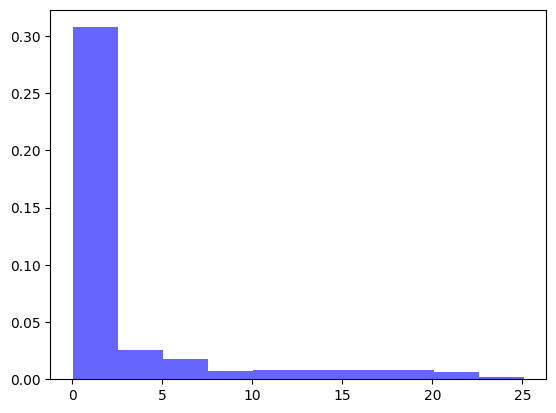

In [141]:
plt.hist(stock_open,density=True, alpha=0.6, color='b')
plt.show()

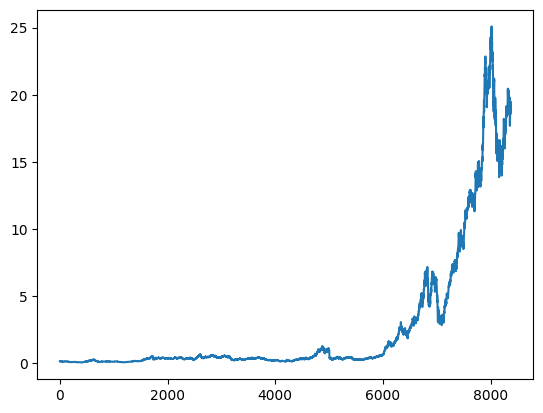

In [142]:
plt.plot(stock_open)

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_stock_open = scaler.fit_transform(stock_open)

In [144]:
scaled_stock_open

array([[0.00314274],
       [0.00289758],
       [0.00254094],
       ...,
       [0.7442867 ],
       [0.75317376],
       [0.74494286]])

In [145]:
print('Mean : ',scaled_stock_open.mean(axis=0))

Mean :  [0.10544379]


In [146]:
print('Standard deviation : ',scaled_stock_open.std(axis=0))

Standard deviation :  [0.20542228]


In [147]:
train.shape

(8375, 7)

In [148]:
scaled_stock_open.shape

(8375, 1)

In [149]:
X_train = []
y_train = []
for i in range(60,8375):
    X_train.append(scaled_stock_open[i-60:i,0])
    y_train.append(scaled_stock_open[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

The above code converts a 1-D array into a 3-D array with dimensions {batch_size, sequence_length} as the LSTM model expects the data to be in the shape of {batch_size, sequence_length, num_features}. num_features is set to one in the next code cells.

In [150]:
print(X_train.shape)
print(y_train.shape)

(8315, 60)
(8315,)


In [151]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(8315, 60, 1)


Building the LSTM model

In [152]:
from keras.models import Sequential 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [153]:
#Defining the model 
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [156]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_17 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_18 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 50)               

In [154]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
260/260 [==============================] - 17s 53ms/step - loss: 0.0018
Epoch 2/10
260/260 [==============================] - 14s 54ms/step - loss: 9.2231e-04
Epoch 3/10
260/260 [==============================] - 14s 54ms/step - loss: 8.7466e-04
Epoch 4/10
260/260 [==============================] - 14s 54ms/step - loss: 6.1976e-04
Epoch 5/10
260/260 [==============================] - 14s 54ms/step - loss: 6.6914e-04
Epoch 6/10
260/260 [==============================] - 14s 54ms/step - loss: 6.2051e-04
Epoch 7/10
260/260 [==============================] - 14s 54ms/step - loss: 6.2890e-04
Epoch 8/10
260/260 [==============================] - 14s 54ms/step - loss: 6.3726e-04
Epoch 9/10
260/260 [==============================] - 14s 54ms/step - loss: 5.2908e-04
Epoch 10/10
260/260 [==============================] - 14s 54ms/step - loss: 5.3812e-04


In [176]:
#Saving the model 
import pickle as pk
with open('Models/LSTM_model.pkl','wb') as file:
    pk.dump(model,file)

Now testing the model performance on future data points

In [163]:
dataset_test = pd.read_csv('Data/test.csv')

In [169]:
dataset_test.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,8375,2014-02-27,18.469286,18.885000,18.430357,18.845358,16.764343,301882000
1,8376,2014-02-28,18.895714,19.026787,18.647142,18.794287,16.718904,371968800
2,8377,2014-03-03,18.693571,18.951786,18.671785,18.848572,16.767199,238781200
3,8378,2014-03-04,18.964287,19.022858,18.848928,18.972857,16.877752,259140000
4,8379,2014-03-05,18.961430,19.098213,18.897499,19.012857,16.913345,200062800


In [170]:
actual_stock_price = dataset_test.iloc[:,2:3].values

In [173]:
#Preparing the input for the model
dataset_total = pd.concat((train['Open'],dataset_test['Open']),axis=0)